# Images and Arrays

The premise of Machine learning is somewhat to turn whatever data we have into numbers and to develop algorithms to find patterns in those numbers. Let us take the particular example of images (about which we are going to talk extensively in this tutorial): we want to represent or turn our images into arrays(NumPy arrays!) so that we can manipulate them, transform them with functions,feed it into machine learning algorithms--- whole world is our oyster once we transform images into usable arrays of numbers!

We are going to discuss some basics, and then some pretty pretty naive mainpulations on them(arrays, that is!)

## Representation

A digital image can be represented as a matrix(an array) of integers called pixels. Each pixel represents a small color box. Each of those integers are $8-bit$ meaning there are $256$ possibilities($0 \ldots 2^{8}-1$).

Consider the simple example below:

In [ ]:
255  0
0    255

The matrix represents the following simple image:
![alt img](img1.jpg)

This can be just an zoomed out image of 4 pixels in an image.In a real case, the pixels are tiny, and we can represent complex figures with larger matrices. If the number of pixels per inch increases, the quality of the image increases. $0$ represents black and $255$ white. Pixel values can be anything between 0 and 255. As the value increases from 0 to 255, the color changes from black to grey to white.

<left><table><tr><th>Where are the colors?</th></tr></table>
    
White light can be formed from 3 basic colors: Red(R), Blue(B) and Green(G). Without going into details assume every other color can be made from R, G, B in different ratios. Till now we saw only greyscale images where each pixel denoted only a single integer, but in color images each pixel denotes $3$ $8-bit$ integers (corresponding to R, G and B). Imagine a matrix representating a colored image as $3$ greyscale matrices stacked on top of each other, each representing a unique *color channel*.
    
Note: While describing colored images we use the *RGB* model, although there are others.
    
Going ahead, we only use the following packages: `numpy`, `scipy`,`matplotlib` and `imageio` (use `pip install xxx` to install them).
    
Lets open and display an image using pyhton code:

<class 'numpy.ndarray'>


/tmp/ipykernel_381/2515277175.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('img2.jpg')


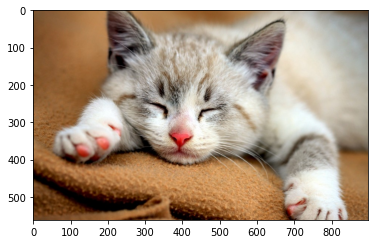

In [2]:
import imageio
import matplotlib.pyplot as plt

# Load image
image = imageio.imread('img2.jpg')
print(type(image))

# Display image
plt.imshow(image)
plt.show()

`imageio.imread` converts the image into a `numpy.ndarray` type, converting each of the pixels into ($3$)values ($0 \ to \ 255$), and the image into a $3D$ matrix.
That's basically it---we have our array, channel values(R,G,B values) of every pixel can be obtained as array elements, we can create slices, manipulate colors, feed into functions, etc.

Going forward we do some naive manipulation with the image for fun!

**How do we create a greyscale(Black& White) image out of a colored one?**

In Greyscale images pixels denote a single value as opposed to three( for R,G & B). Therefore, we can take the average of the three values, in order to convert it to greyscale, and it would hopefully not destroy the image.


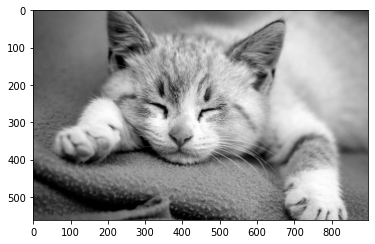

In [4]:
import numpy as np
(row, col, _) = image.shape 

grey_image = np.zeros((row, col)) # All 0 matrix as initialization---> fully black image

for i in range(row):
    for j in range(col):
        grey_image[i, j] = image[i, j].mean() # mean of R,G,B values

plt.imshow(grey_image, cmap='gray'); plt.show()

In [7]:
image = imageio.imread('img2.jpg')
image.shape

/tmp/ipykernel_381/1866909528.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('img2.jpg')


(562, 898, 3)

The first two value in the above tuple denote the dimensions of the image i.e. 562x898 pixels, and the third "3" represents the three color channels R,G,B. Now, let us write the individual channels to separate image files:

In [8]:
imageio.imwrite('red.jpg', image[:, :, 0])
imageio.imwrite('green.jpg', image[:, :, 1])
imageio.imwrite('blue.jpg', image[:, :, 2])

Right now they are all greyscale because they are single channel images($2D$ matrices) now (equivalent to greyscale). Each pixel in a single channel (say"Red" channel) represents the amount of Red color from $0$(black) to $255$(Red). Let us create three separate images($3D$ matrices) with only red, green and blue color respectively.

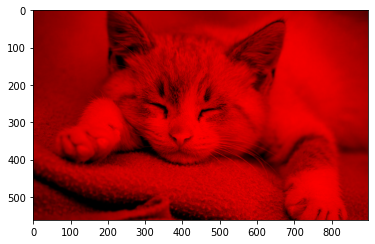

In [13]:
red_image = image.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

plt.imshow(red_image)
plt.show()

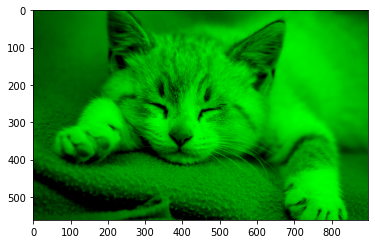

In [14]:
green_image = image.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

plt.imshow(green_image)
plt.show()

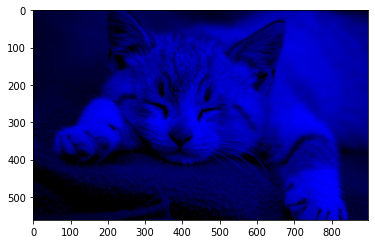

In [15]:
blue_image = image.copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

plt.imshow(blue_image)
plt.show()